# Chapter 14 함수를 데이터에 피팅하기

Helper functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xsteps=100,ysteps=100):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    fv = np.vectorize(f)
    X = np.linspace(xmin, xmax, xsteps)
    Y = np.linspace(ymin, ymax, ysteps)
    X, Y = np.meshgrid(X, Y)
    z = fv(X,Y)
    fig, ax = plt.subplots()
    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)

In [2]:
from vectors import length 
def secant_slope(f,xmin,xmax):
    return (f(xmax) - f(xmin)) / (xmax - xmin)

def approx_derivative(f,x,dx=1e-6):
    return secant_slope(f,x-dx,x+dx)

def approx_gradient(f,x0,y0,dx=1e-6):
    partial_x = approx_derivative(lambda x:f(x,y0),x0,dx=dx)
    partial_y = approx_derivative(lambda y:f(x0,y),y0,dx=dx)
    return (partial_x,partial_y)
    
def gradient_descent(f,xstart,ystart,tolerance=1e-6):
    x = xstart
    y = ystart
    grad = approx_gradient(f,x,y)
    while length(grad) > tolerance:
        x -= 0.01 * grad[0]
        y -= 0.01 * grad[1]
        grad = approx_gradient(f,x,y)
    return x,y

import car data

In [3]:
from car_data import priuses

## 14.1 함수의 적합도 측정하기

### 14.1.1 함수와의 거리 측정하기

In [4]:
test_data = [
     (-1.0, -2.0137862606487387),
     (-0.9, -1.7730222478628337),
     (-0.8, -1.5510125944820812),
     (-0.7, -1.6071832453434687),
     (-0.6, -0.7530149734137868),
     (-0.5, -1.4185018340443283),
     (-0.4, -0.6055579756271128),
     (-0.3, -1.0067254915961406),
     (-0.2, -0.4382360549665138),
     (-0.1, -0.17621952751051906),
     (0.0, -0.12218090884626329),
     (0.1, 0.07428573423209717),
     (0.2, 0.4268795998864943),
     (0.3, 0.7254661223608084),
     (0.4, 0.04798697977420063),
     (0.5, 1.1578103735448106),
     (0.6, 1.5684111061340824),
     (0.7, 1.157745051031345),
     (0.8, 2.1744401978240675),
     (0.9, 1.6380001974121732),
     (1.0, 2.538951262545233)
]

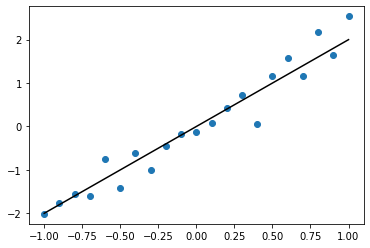

In [5]:
plt.scatter([t[0] for t in test_data],[t[1] for t in test_data])
plot_function(lambda x: 2*x,-1,1,c='k')

Here's the drawing routine I used to illustrate the absolute value cost function

In [6]:
def draw_cost(h,points):
    xs = [t[0] for t in points]
    ys = [t[1] for t in points]
    plt.scatter(xs,ys)
    plot_function(h,min(xs),max(xs),c='k')
    for (x,y) in points:
        plt.plot([x,x],[y,h(x)],c='r')

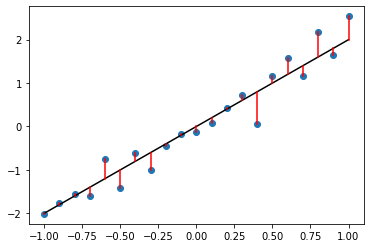

In [7]:
draw_cost(lambda x: 2*x, test_data)

In [8]:
def sum_error(f,data):
    errors = [abs(f(x) - y) for (x,y) in data]
    return sum(errors)

In [9]:
def f(x): 
    return 2*x

def g(x): 
    return 1-x

In [10]:
sum_error(f,test_data)

5.021727176394801

In [11]:
sum_error(g,test_data)

38.47711311130152

### 14.1.2 오차 제곱의 합 구하기

In [12]:
def sum_squared_error(f,data):
    squared_errors = [(f(x) - y)**2 for (x,y) in data]
    return sum(squared_errors)

In [13]:
def draw_square_cost(h,points):
    xs = [t[0] for t in points]
    ys = [t[1] for t in points]
    plt.scatter(xs,ys)
    plot_function(h,min(xs),max(xs),c='k')
    for (x,y) in points:
        e = abs(y - h(x))
        plt.plot([x,x],[y,h(x)],c='r')
        plt.fill([x,x,x+e,x+e],[h(x),y,y,h(x)],c='r',alpha=0.5)

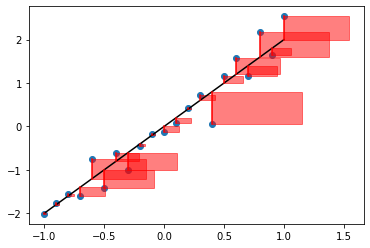

In [14]:
draw_square_cost(lambda x: 2*x, test_data)

In [15]:
sum_squared_error(f,test_data)

2.105175107540148

In [16]:
sum_squared_error(g,test_data)

97.1078879283203

### 14.1.3 자동차 가격 함수에 대한 비용 구하기

In [17]:
def plot_mileage_price(cars):
    prices = [c.price for c in cars]
    mileages = [c.mileage for c in cars]
    plt.scatter(mileages, prices, alpha=0.5)
    plt.ylabel("Price ($)",fontsize=16)
    plt.xlabel("Odometer (mi)",fontsize=16)

In [18]:
def p1(x):
    return 25000 - 0.2 * x

def p2(x):
    return 25000 - 0.1 * x

def p3(x):
    return 22500 - 0.1 * x

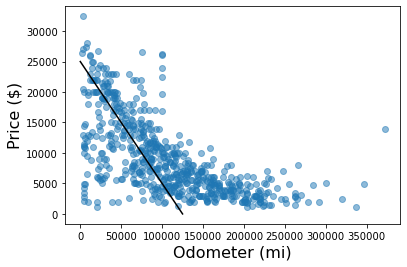

In [19]:
plot_mileage_price(priuses)
plot_function(p1,0,125000,c='k')

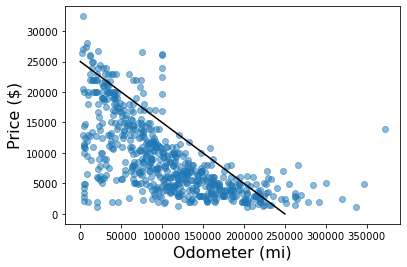

In [20]:
plot_mileage_price(priuses)
plot_function(p2,0,250000,c='k')

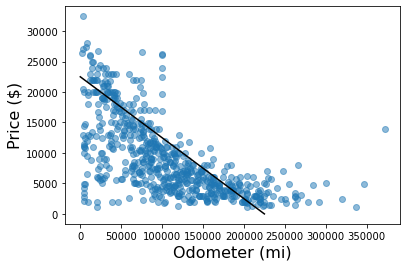

In [21]:
plot_mileage_price(priuses)
plot_function(p3,0,225000,c='k')

In [22]:
prius_mileage_price = [(p.mileage, p.price) for p in priuses]

In [23]:
sum_squared_error(p1, prius_mileage_price)

88782506640.24

In [24]:
sum_squared_error(p2, prius_mileage_price)

34723507681.56001

In [25]:
sum_squared_error(p3, prius_mileage_price)

22997230681.560005

### 14.1.4 연습문제

### 연습문제 14.1
직선 위에 놓인 데이터 포인트 집합을 만들어서 해당 일차함수에 대해 두 비용 함수 `sum_error`와 `sum_squared_error`가 모두 0을 리턴함을 시연하라.

In [26]:
def line(x):
    return 3*x-2
points = [(x,line(x)) for x in range(0,10)]

In [27]:
sum_error(line,points)

0

In [28]:
sum_squared_error(line,points)

0

### 연습문제 14.2
두 일차함수 $x + 0.5$와 $2x - 1$의 비용 함수 값을 계산하라. 어느 함수가 `test_data`에 상대적인 제곱 오차 합이 더 작은지 구하라. 또한 두 일차함수의 적합도를 설명하라.

In [29]:
sum_squared_error(lambda x:2*x-1,test_data)

23.1942461283472

In [30]:
sum_squared_error(lambda x:x+0.5,test_data)

16.607900877665685

### 연습문제 14.3
p1, p2, p3보다 데이터 적합도가 높은 일차함수 p4를 구하라. 비용 함수가 p1, p2, p3일 때보다 작음을 보여서 적합도가 더 높음을 확인하라.

In [31]:
def p4(x):
    return 20000 - 0.1 * x

In [32]:
sum_squared_error(p4, prius_mileage_price)

18958453681.55999

## 14.2 함수의 공간 살펴보기

### 14.2.1 원점을 지나는 직선에 대한 비용 그리기

In [33]:
def test_data_coefficient_cost(a):
    def f(x):
        return a * x
    return sum_squared_error(f,test_data)

Plots from the chapter

Text(0.5, 0, 'a')

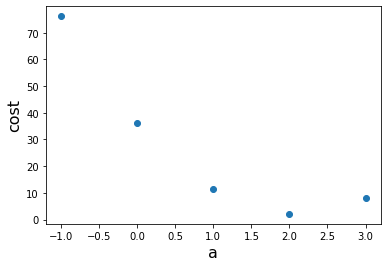

In [34]:
some_slopes = [-1,0,1,2,3]
plt.scatter(some_slopes,[test_data_coefficient_cost(a) for a in some_slopes])
plt.ylabel("cost", fontsize=16)
plt.xlabel("a", fontsize=16)

Text(0.5, 0, 'x')

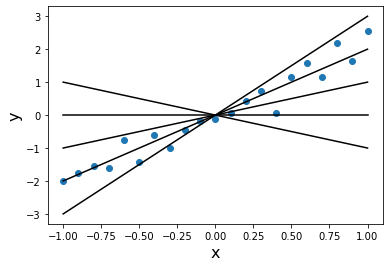

In [35]:
plt.scatter([t[0] for t in test_data],[t[1] for t in test_data])
for a in some_slopes:
    plot_function(lambda x: a*x, -1, 1, c='k')
plt.ylabel("y", fontsize=16)
plt.xlabel("x", fontsize=16)

Text(0.5, 0, 'a')

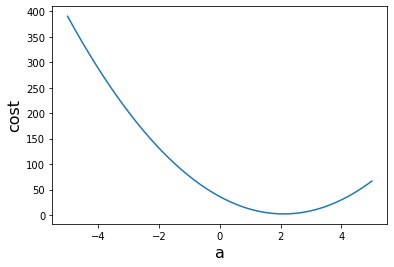

In [36]:
plot_function(test_data_coefficient_cost, -5, 5)
plt.ylabel("cost", fontsize=16)
plt.xlabel("a", fontsize=16)

### 14.2.2 모든 일차함수의 공간

In [37]:
def coefficient_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,prius_mileage_price)

In [38]:
def coefficient_cost(a,b):
    def p(x):
        return a * x + b
    return sum_squared_error(p,prius_mileage_price)

Plots from the chapter

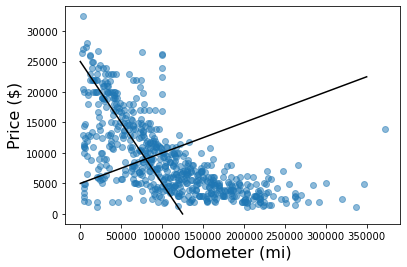

In [39]:
plot_mileage_price(priuses)
plot_function(lambda x: 25000 - 0.20*x,0,125000,c='k')
plot_function(lambda x: 5000 + 0.05*x,0,350000,c='k')

Text(0.5, 0, 'a')

<Figure size 504x504 with 0 Axes>

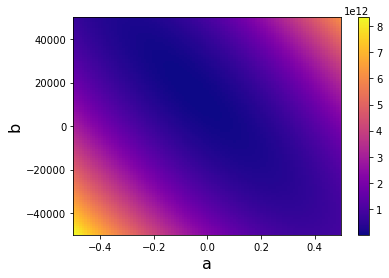

In [40]:
scalar_field_heatmap(coefficient_cost,-0.5,0.5,-50000,50000)
plt.ylabel("b",fontsize=16)
plt.xlabel("a",fontsize=16)

### 14.2.3 연습문제

### 연습문제 14.4
점 $(3,4)$와 원점을 지나는 직선의 방정식을 구하라. 단, 함수를 $f(x) = ax$라고 두고 한 점밖에 없는 데이터셋에 따른 제곱 오차 합을 최소화하는 함수를 찾는 방식으로 구하라.

#### 계수는 $a$만 구하면 된다. 제곱 오차 합은 $f(3) = a \cdot 3$과 $4$의 차를 제곱한 $(3a-4)^2$으로, 이를 전개하면 $9a^2-24a+16$이다. 이 식은 $a$에 관한 비용함수 $c(a) = 9a^2 - 24a + 16$이다.
#### 여기서 가장 좋은 $a$값은 비용을 최소화하는 값이다. 그러한 $a$값은 비용 함수의 도함수를 0으로 만든다. 10장의 미분법을 사용하면 $c'(a) = 18a - 24$이다. 이 도함수는 $a = 4/3$일 때 $0$으로 최적합 직선은 $f(x) = \frac{4}{3}x$임을 의미한다. 이 직선은 원점과 점 $(4,3)$을 모두 지난다.

### 연습문제 14.5
주행거리에 대한 스포츠카 가격을 모델링하기 위해 계수가 $(a,b) = (-0.4, 80000)$인 일차함수 $f(x) = ax + b$를 사용한다고 하자. 시간에 따라 자동차의 가치가 어떻게 떨어지는지 서술하라.

#### $x=0$일 때 $ax + b$값은 $b = 80000$이다. 주행거리가 $0$인 시점에서 스포츠카를 8만 달러에 판다고 기대한다는 뜻이다. $a = -0.4$는 $x$가 1단위씩 증가할 때마다 함숫값 $ax+b$가 0.4단위 비율로 감소함을 의미한다. 문제에서는 스포츠카를 1마일 운전할 때마다 가치가 평균적으로 40센트씩 감소한다는 듯이다.

## 14.3 경사하강법을 사용해 최적합 직선 구하기

### 14.3.1 데이터를 다시 스케일링하기

In [41]:
def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c,50000*d)/1e13

In [42]:
mileages = [p.mileage for p in priuses]
prices = [p.price for p in priuses]

In [43]:
def scaled_cost_function(c,d):
    return coefficient_cost(0.5*c,50000*d)/1e13

### 14.3.2 최적합 직선 구하기 및 플로팅하기

In [44]:
c,d = gradient_descent(scaled_cost_function,0,0)

In [45]:
(c,d)

(-0.12111901781162775, 0.3149542288803001)

In [46]:
a = 0.5*c
b = 50000*d
(a,b)

(-0.06055950890581387, 15747.711444015005)

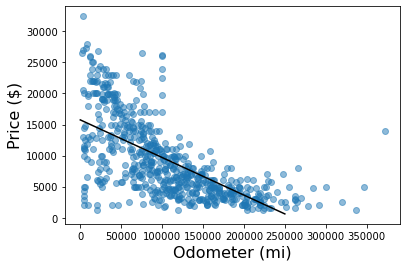

In [47]:
plot_mileage_price(priuses)

def p(x):
    return a*x + b

plot_function(p,0,250000,c='k')

In [48]:
coefficient_cost(a,b)

14536218169.403479

### 14.3.3 연습문제

### 연습문제 14.6
경사하강법을 사용해서 `test_data` 데이터셋에 가장 적합한 일차함수를 구하라. 여러분이 구한 함수는 $2x + 0$에 가깝겠지만 완전히 같진 않을 텐데, 데이터가 해당 직선 주변에서 랜덤하게 생성되었기 때문이다.

In [49]:
def test_data_linear_cost(a,b):
    def f(x):
        return a*x+b
    return sum_squared_error(f,test_data)

<Figure size 504x504 with 0 Axes>

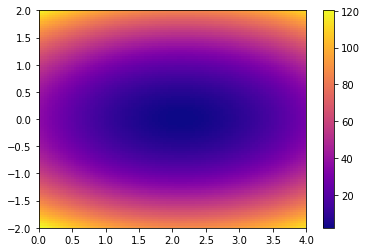

In [50]:
scalar_field_heatmap(test_data_linear_cost,-0,4,-2,2)

In [51]:
gradient_descent(test_data_linear_cost,1,1)

(2.103718204723903, 0.0021207385903566456)

## 14.4 비선형함수 피팅하기

### 14.4.1 지수함수 증감 이해하기

In [52]:
from math import exp

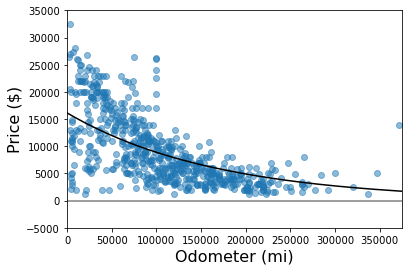

In [53]:
plot_mileage_price(priuses)
plt.ylim(-5000,35000)
plt.xlim(0,375000)
plot_function(lambda x:0, -50000, 400000, c='gray')
q,r = (16133.220556990309, -5.951793936498175e-06)
plot_function(lambda x: q*exp(r*x),0,375000,c='k')

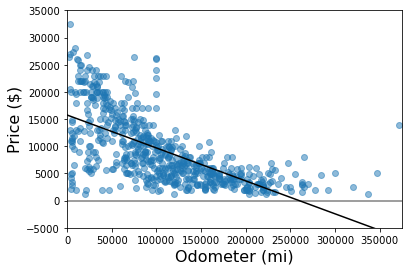

In [54]:
plot_mileage_price(priuses)
plt.ylim(-5000,35000)
plt.xlim(0,375000)
plot_function(lambda x:0, -50000, 400000, c='gray')

plot_function(lambda x: a*x + b,0,375000,c='k')

### 14.4.2 최적합 지수함수 구하기

In [55]:
def exp_coefficient_cost(q,r):
    def f(x):
        return q*exp(r*x) #<1>
    return sum_squared_error(f,prius_mileage_price)

<Figure size 504x504 with 0 Axes>

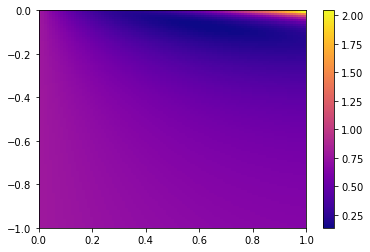

In [56]:
def scaled_exp_coefficient_cost(s,t):
    return exp_coefficient_cost(30000*s,1e-4*t) / 1e11

scalar_field_heatmap(scaled_exp_coefficient_cost,0,1,-1,0)

In [57]:
s,t = gradient_descent(scaled_exp_coefficient_cost,0,0)
(s,t)

(0.6235404892841315, -0.07686877731111157)

In [58]:
q,r = 30000*s,1e-4*t
(q,r)

(18706.214678523946, -7.686877731111157e-06)

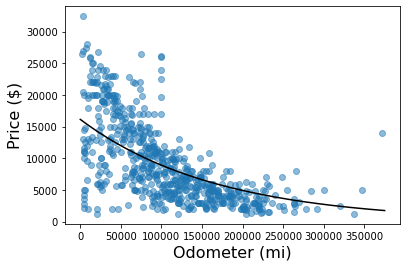

In [59]:
plot_mileage_price(priuses)
q,r = (16133.220556990309, -5.951793936498175e-06)
plot_function(lambda x: q*exp(r*x),0,375000,c='k')

In [60]:
exp_coefficient_cost(q,r)

14071654468.280848

### 14.4.3 연습문제

### 연습문제 14.7
$x$가 $1/r$단위 증가할 때마다 $e^{-rx}$은 $e$배 감소함을 $r$값을 선택해 확인하라.

In [61]:
def test(x):
    return exp(-3*x)

In [62]:
test(0)

1.0

In [63]:
from math import e

In [64]:
test(1/3), test(0)/e

(0.36787944117144233, 0.36787944117144233)

In [65]:
test(2/3), test(1/3)/e

(0.1353352832366127, 0.1353352832366127)

In [66]:
test(1), test(2/3)/e

(0.049787068367863944, 0.04978706836786395)

### 연습문제 14.8
앞에서 구한 최적합 지수함수에 따르면 중고 프리우스의 가치는 10,000마일마다 몇 퍼센트씩 감소하는가?

In [67]:
exp(r * 10000)

0.9422186306357088

### 연습문제 14.9
프리우스 판매가(주행거리가 0마일일 때 가격)가 25,000 달러라고 할 때, 데이터에 가장 적합한 지수함수를 구하라. $q = 25000$이라고 고정한 뒤 $qe^{rx}$꼴인 최적합 지수함수에 해당하는 $r$값을 구하면 된다.

In [68]:
def exponential_cost2(r):
    def f(x):
        return 25000 * exp(r*x)
    return sum_squared_error(f,prius_mileage_price)

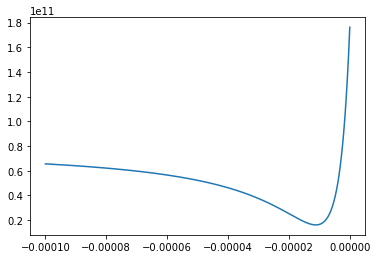

In [69]:
plot_function(exponential_cost2,-1e-4,0)

In [70]:
# note that r = -1.12e-5 yields a smaller cost function than some values around it.
exponential_cost2(-1.11e-5), exponential_cost2(-1.12e-5), exponential_cost2(-1.13e-5)

(16157457680.500858, 16156919168.114109, 16161508051.813204)

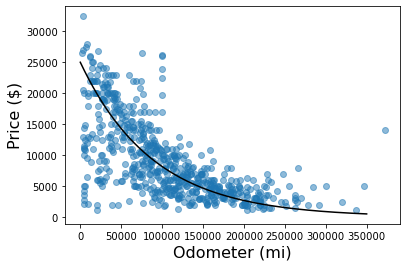

In [71]:
plot_mileage_price(priuses)
plot_function(lambda x: 25000 * exp(-1.12e-5 * x), 0, 350000, c='k')